In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
url = "web_scraper/jumanji.csv"
df = pd.read_csv(url)
df.head(15)

,actor,movie_or_TV_name
0,Morgan Turner,Jumanji: The Next Level
1,Morgan Turner,Jumanji: Welcome to the Jungle
2,Morgan Turner,Wonderstruck
3,Morgan Turner,Halal in the Family
4,Morgan Turner,Quitters
5,Morgan Turner,The Sisterhood of Night
6,Morgan Turner,A Miracle in Spanish Harlem
7,Morgan Turner,Blue Bloods
8,Morgan Turner,Spring/Fall
9,Morgan Turner,Mildred Pierce


In [3]:
len(df.actor.unique())

88

In [4]:
df.shape

(3398, 2)

In [5]:
G = nx.from_pandas_edgelist(df.iloc[0:3398], 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [6]:
to_be_removed = [x for  x in G.nodes() if (G.degree(x) <= 5 or G.degree(x) > 50)]

In [7]:
for x in to_be_removed:
    G.remove_node(x)

In [8]:
colors = []
for node in G:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

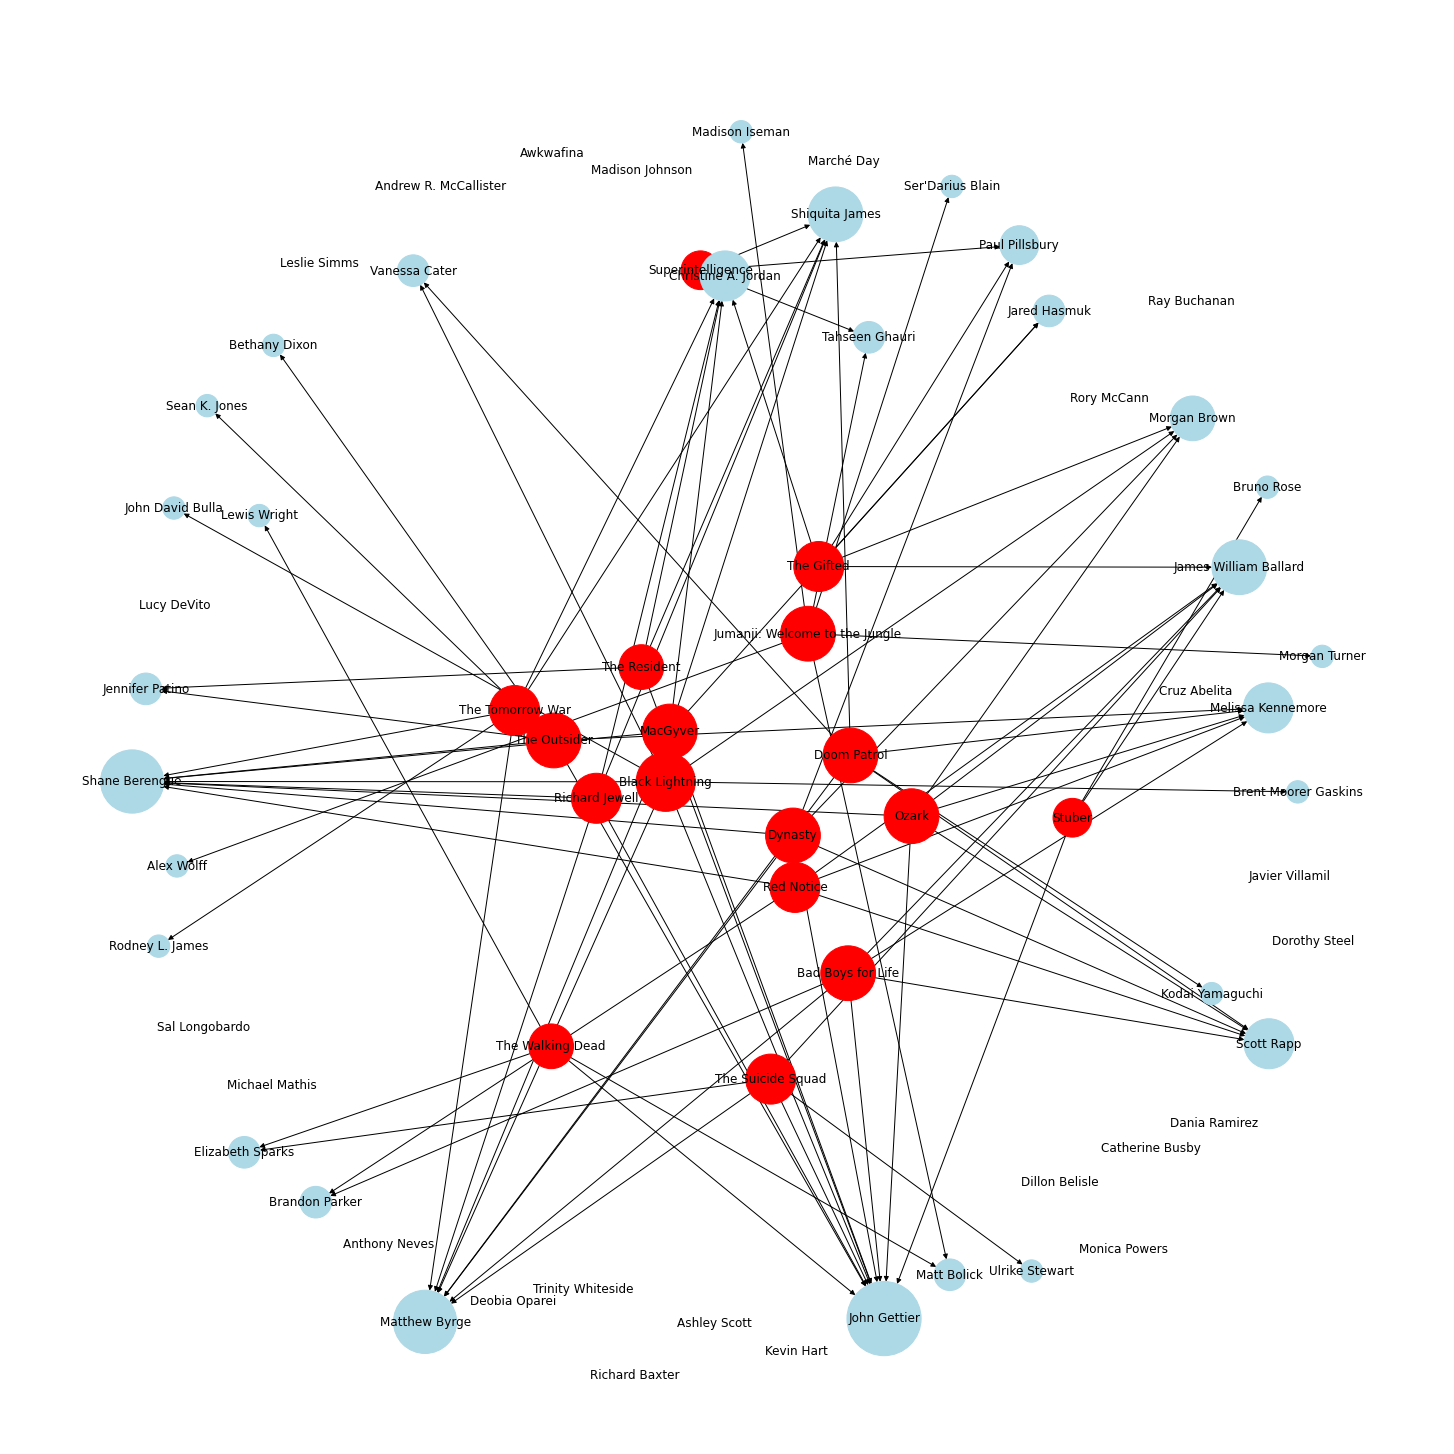

In [9]:
deg = G.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [500*deg[i] for i in G.nodes()])

In [10]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('John Gettier', 11),
 ('Matthew Byrge', 8),
 ('Shane Berengue', 8),
 ('Black Lightning', 7),
 ('Jumanji: Welcome to the Jungle', 6),
 ('Doom Patrol', 6),
 ('Dynasty', 6),
 ('Ozark', 6),
 ('Bad Boys for Life', 6),
 ('The Outsider', 6),
 ('MacGyver', 6),
 ('Shiquita James', 6),
 ('James William Ballard', 6),
 ('The Gifted', 5),
 ('The Suicide Squad', 5),
 ('Richard Jewell', 5),
 ('Scott Rapp', 5),
 ('Red Notice', 5),
 ('The Tomorrow War', 5),
 ('Melissa Kennemore', 5),
 ('Christine A. Jordan', 5),
 ('The Resident', 4),
 ('The Walking Dead', 4),
 ('Morgan Brown', 4),
 ('Stuber', 3),
 ('Superintelligence', 3),
 ('Paul Pillsbury', 3),
 ('Elizabeth Sparks', 2),
 ('Brandon Parker', 2),
 ('Jared Hasmuk', 2),
 ('Tahseen Ghauri', 2),
 ('Matt Bolick', 2),
 ('Vanessa Cater', 2),
 ('Jennifer Patino', 2),
 ('Morgan Turner', 1),
 ('Madison Iseman', 1),
 ('Alex Wolff', 1),
 ("Ser'Darius Blain", 1),
 ('Kodai Yamaguchi', 1),
 ('Lewis Wright', 1),
 ('Ulrike Stewart', 1),
 ('Bruno Rose', 1),
 ('Sean K. 